In [1]:
import matplotlib as mpl
import pandas as pd
import scanpy as sc
import seaborn as sns
import pathlib
%matplotlib inline
from matplotlib import pyplot as plt
savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0.1,
    "transparent": True,
}

mpl.rc("savefig", dpi=300)

output_suffix = ""
output_formats = [".png", ".pdf"]

sc.set_figure_params(dpi_save=150, frameon=False,
 vector_friendly=True, fontsize=6, figsize=(3,3), format='pdf', transparent=True)

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)
%load_ext autoreload
%autoreload 2
%run ../helper.py
sns.set_style("ticks")
plt.style.use('../bursa.mplstyle')

## Load the Data

In [2]:

# Flag to control the sharing computation, takes a while only needs done once
vdj_infile = '../../../data/integrated_cell_calls_ambient_annotated.tsv.gz'

In [3]:
df = pd.read_table(vdj_infile, index_col=0, usecols=["vdj_sequence", "lineage_id", 'v_mismatch', 'donor', 'probable_hq_single_b_cell', 'subanatomical_location', 'tissue', 'locus', 'c_call', 'sample_uid', 'cb'])


/tmp/ipykernel_386158/816300778.py:1: DtypeWarning: Columns (2,4,5,76,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(vdj_infile, index_col=0, usecols=["vdj_sequence", "lineage_id", 'v_mismatch', 'donor', 'probable_hq_single_b_cell', 'subanatomical_location', 'tissue', 'locus', 'c_call', 'sample_uid', 'cb'])


In [7]:
df = df.dropna(subset="locus")

In [11]:
plot_df = df[df.v_mismatch > 2]

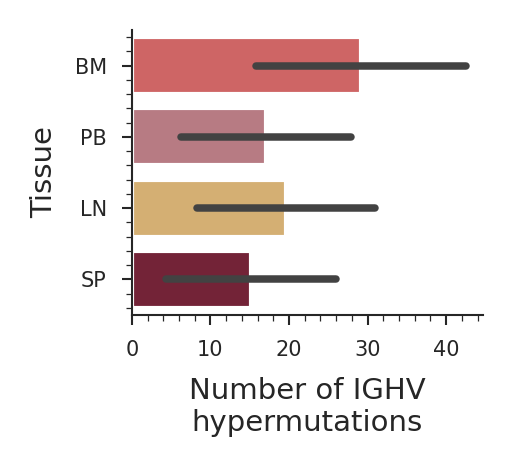

In [118]:
# Import Seaborn library
import seaborn as sns

# Create the bar plot with error bars representing the standard deviation ('sd')
fig, ax = plt.subplots(1,1, figsize = (1.5, 1.25))
sns.barplot(y='tissue', x='v_mismatch', data=plot_df, errorbar='sd', palette=get_tissue_colors())

# Label the axes
plt.ylabel('Tissue')
plt.xlabel('Number of IGHV\nhypermutations')

# Show the plot
plt.show()


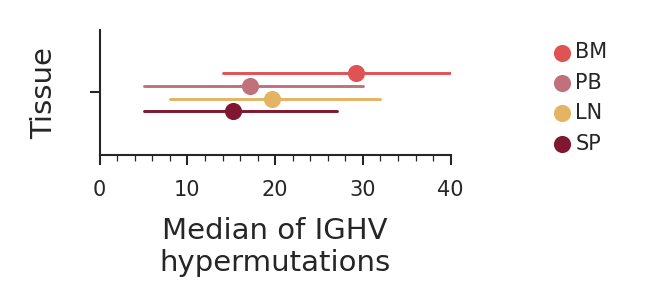

In [162]:
# Create a new column with a constant value, e.g., 'All Tissues'
plot_df.loc[:,'constant'] = 'All Tissues'

# Create the point plot
fig, ax = plt.subplots(1,1, figsize = (1.5, 0.55))
sns.pointplot(y='constant', x='v_mismatch', hue='tissue', data=plot_df, dodge=0.3, errorbar=('pi', 75), errwidth=0.7, scale=0.7, palette=get_tissue_colors())

# Label the axes
plt.ylabel('Tissue')
plt.xlabel('Median of IGHV\nhypermutations')

# Remove y-tick labels as there's only one category
ax.set_yticklabels([])
ax.set_xlim(0, 40)
ax.legend(bbox_to_anchor=(1.5, 1.05))

/tmp/ipykernel_386158/2973700892.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(y='constant', x='v_mismatch', hue='tissue', data=plot_df, ci=None, scale=0, palette=get_tissue_colors())
/tmp/ipykernel_386158/2973700892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.tissue = plot_df.tissue.astype('category')


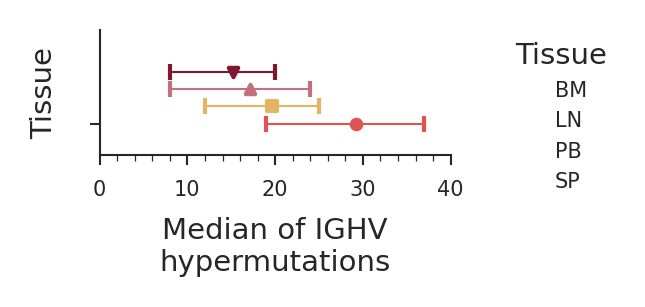

In [179]:
# Create the point plot
fig, ax = plt.subplots(1,1, figsize = (1.5, 0.55))
sns.pointplot(y='constant', x='v_mismatch', hue='tissue', data=plot_df, ci=None, scale=0, palette=get_tissue_colors())

# List of marker styles to use for each tissue
marker_list = ['o', 's', '^', 'v', '<', '>', 'P', 'X', 'D']


plot_df.tissue = plot_df.tissue.astype('category')
# Loop through each tissue to add points with error bars
for i, tissue in enumerate(plot_df['tissue'].cat.categories):
    tissue_data = plot_df[plot_df['tissue'] == tissue]['v_mismatch']
    x_mean = np.mean(tissue_data)
    x_ci_lower, x_ci_upper = np.percentile(tissue_data, [25, 75])  # Replace with your desired CI calculation
    
    # Plot the point
    ax.scatter(x_mean, 0+i*1.1, color=color_mapping[tissue], marker=marker_list[i % len(marker_list)], zorder=3, s=5)
    
    # Add the error bar
    ax.errorbar(x_mean, 0+i*1.1, xerr=[[x_mean - x_ci_lower], [x_ci_upper - x_mean]], color=color_mapping[tissue], capsize=2, linewidth=0.5)

# Label the axes
plt.ylabel('Tissue')
plt.xlabel('Median of IGHV\nhypermutations')

# Remove y-tick labels as there's only one category
ax.set_yticklabels([])
ax.set_ylim(-2,6)
# Set x-axis limit
ax.set_xlim(0, 40)

# Add legend
ax.legend(plot_df['tissue'].cat.categories.tolist(), title='Tissue', bbox_to_anchor=(1.5, 1.05))

# Show the plot
plt.show()


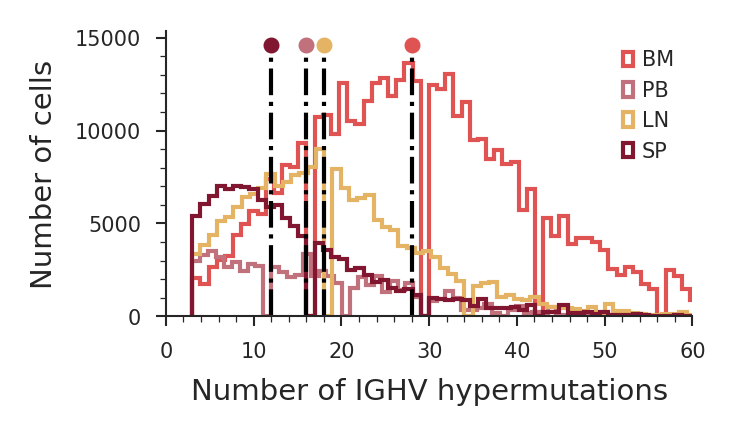

In [145]:
# Create an empty figure and axis
fig, ax = plt.subplots(1,1, figsize = (2.25, 1.25))

# Initialize variable to keep track of global maximum y-value
global_y_max = 0

# Loop through each unique tissue to plot its histogram and find global y-max
for tissue in unique_tissues:
    # Filtering data for the current tissue
    tissue_data = plot_df[plot_df['tissue'] == tissue]['v_mismatch']
    
    # Plotting the histogram with step elements and no fill, and capturing bin counts
    n, bins, patches = ax.hist(tissue_data, bins=100, histtype='step', edgecolor=color_mapping[tissue], label=tissue)
    
    # Update the global y-max if necessary
    current_y_max = np.max(n)
    if current_y_max > global_y_max:
        global_y_max = current_y_max

# Add some margin above the global y-max
global_y_max += 1000

# Loop again to add median points at global y-max
for tissue in unique_tissues:
    # Filtering data for the current tissue
    tissue_data = plot_df[plot_df['tissue'] == tissue]['v_mismatch']
    
    # Calculate the median value
    median_value = np.median(tissue_data)
    
    # Plot a point at the median x-value and the global y-max
    ax.scatter(median_value, global_y_max, color=color_mapping[tissue], zorder=5, s=8)
    ax.vlines(median_value, ymax=global_y_max, ymin = 0, linestyles='-.', color = 'k')

# Adding legend to differentiate tissues
ax.legend()

# Setting x-axis limit and labels
ax.set_xlim(0,60)
ax.set_xlabel("Number of IGHV hypermutations")
ax.set_ylabel("Number of cells")
ax.set_yscale('linear')

# Show the plot
plt.show()


(0.0, 70.0)

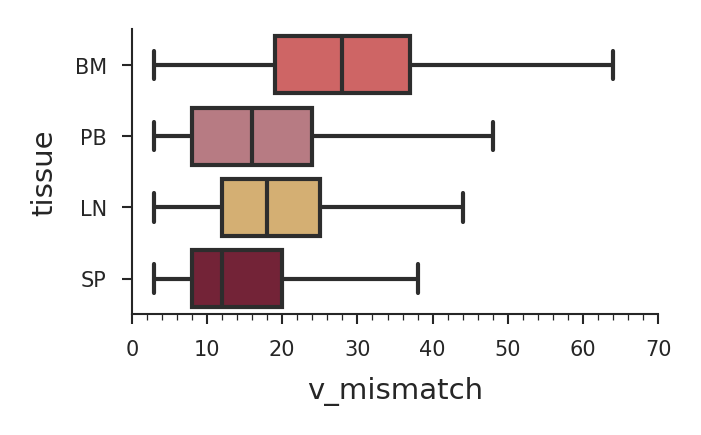

In [153]:
# Create the violin plot
fig, ax = plt.subplots(1,1, figsize = (2.25, 1.25))
sns.boxplot(data=plot_df, x='v_mismatch', y='tissue', palette=get_tissue_colors(), fliersize=0)

# Remove minor y-axis ticks
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.set_xlim(0,70)


StopIteration: 

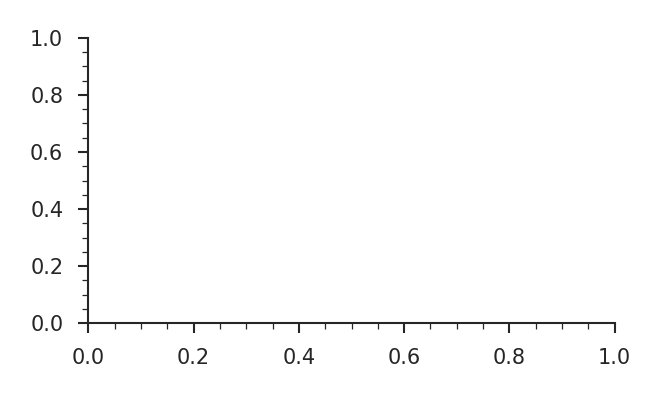

In [159]:
# Create the violin plot
fig, ax = plt.subplots(1,1, figsize = (2.25, 1.25))
sns.pointplot(data=plot_df, x='v_mismatch', y='tissue', palette=get_tissue_colors(), errorbar=('pi', 75))

# Remove minor y-axis ticks
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.set_xlim(0,50)

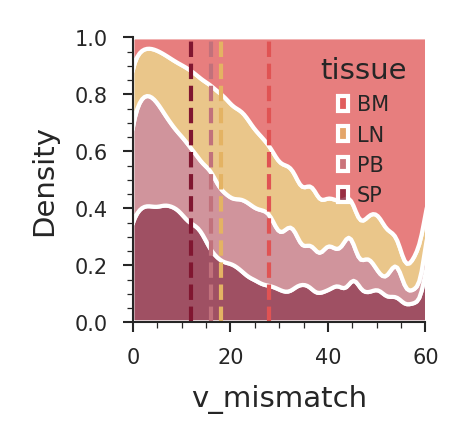

In [148]:
fig, ax = plt.subplots(1,1,figsize = (1.25,1.25))
sns.kdeplot(data=plot_df.groupby('tissue').sample(n=plot_df.tissue.value_counts().min()), x='v_mismatch', hue='tissue', palette=get_tissue_colors(), multiple='fill')
ax.set_xlim(0,60)

# Add vertical lines for medians
for tissue in unique_tissues:
    tissue_data = plot_df[plot_df['tissue'] == tissue]['v_mismatch']
    median_value = np.median(tissue_data)
    ax.axvline(median_value, color=color_mapping[tissue], linestyle='--', linewidth=1)

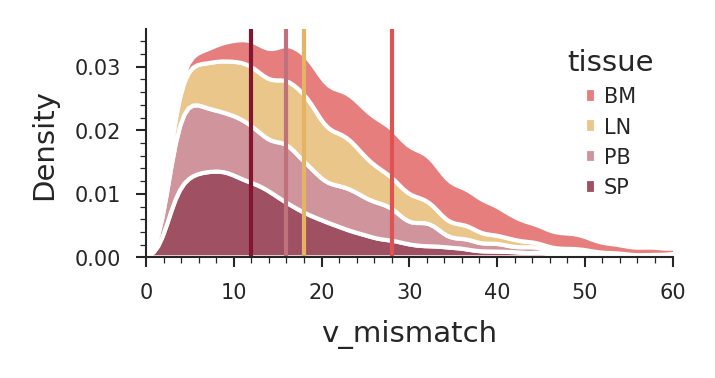

In [180]:
fig, ax = plt.subplots(1,1,figsize = (2.25,1))
sns.kdeplot(data=plot_df.groupby('tissue').sample(n=plot_df.tissue.value_counts().min()), x='v_mismatch', hue='tissue', palette=get_tissue_colors(), multiple='stack')
ax.set_xlim(0,60)

# Add vertical lines for medians
for tissue in unique_tissues:
    tissue_data = plot_df[plot_df['tissue'] == tissue]['v_mismatch']
    median_value = np.median(tissue_data)
    ax.axvline(median_value, color=color_mapping[tissue], linestyle='-', linewidth=1)

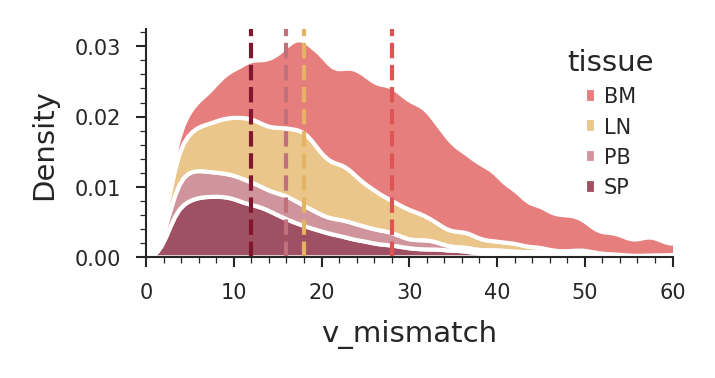

In [181]:
fig, ax = plt.subplots(1,1,figsize = (2.25,1))
sns.kdeplot(data=plot_df, x='v_mismatch', hue='tissue', palette=get_tissue_colors(), multiple='stack')
ax.set_xlim(0,60)

# Add vertical lines for medians
for tissue in unique_tissues:
    tissue_data = plot_df[plot_df['tissue'] == tissue]['v_mismatch']
    median_value = np.median(tissue_data)
    ax.axvline(median_value, color=color_mapping[tissue], linestyle='--', linewidth=1)